# Import Libraries and Data
First, let's import necessary libraries: pandas, seaborn, matplotlib.pyplot, numpy.

Import the data as a DataFrame called racehorses. There are 8 columns and 8987 rows. All the values are stored as strings. This short preliminary analysis shows that the data needs some cleaning, inluding changes in data types and in the records themselves. 

In [99]:
# Import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [100]:
# Create a DataFrame.
racehorses = pd.read_csv('horseracing_data.csv')
racehorses.head()

,data,tor,dystans,kat.,jeździec,waga,trener,mc,wygrana
0,13.05.2018,Warszawa,2000 m,B,dż. T. Lukašek,61,W. Olkowski,1 / 7,20 000 zł
1,24.09.2017,Warszawa,2600 m,G1 A,dż. T. Lukašek,55,W. Olkowski,1 / 5,126 000 zł
2,27.08.2017,Warszawa,2800 m,L A,dż. T. Lukašek,54½,W. Olkowski,1 / 5,54 000 zł
3,02.07.2017,Warszawa,2400 m,G1,dż. T. Lukašek,59,W. Olkowski,1 / 17,100 000 zł
4,11.06.2017,Warszawa,2200 m,L A,dż. T. Lukašek,59,W. Olkowski,2 / 8,13 200 zł


In [101]:
racehorses.shape

(8987, 9)

In [102]:
racehorses.dtypes

data        object
tor         object
dystans     object
kat.        object
jeździec    object
waga        object
trener      object
mc          object
wygrana     object
dtype: object

# Data Cleaning
The most important task is to change the data types. However, to achive this, the columns should be cleaned: 1) translate column names to English; 2) remove ' m' from 'dystans' and 'zł ' from 'wygrana'; 3) replace the 'mc' column, with the structure 'place / out of', with two columns, named 'place' and 'out_of' accordingly; 4) change fractions written with a '/' to decimal fractions; 5) create a new column, 'jockey_category', to store jockey categories, now listed along with the name of the jockey in 'jeździec'. Only then will it be possible to change the column types to appropriate ones.

I've encountered the problem while executing point 3): 17 records contain a letter 'D' instead of the number of place taken by a given horse. The letter probably means that a horse was disqualified. However, there are also instances of place '0', which also means disqualification. As I am not sure what exactly the letter means, and since there are only 17 appearances of it in the entire DataFrame, I decided to drop these rows. This leaves me with a DataFrame containing 9870 records.

The last part of the data cleaning process is to create a column that would store jockey categories. In Poland, each professional jockey is assigned a category, based on how many races he or she has won:
u. - uczeń (a jockey who did not win more than 10 races)
st. u. - starszy uczeń (a jockey who did not win more than 25 races)
pr. dż. - praktykant dżokejski (a jockey who did not win more than 50 races)
k. dż. - kandydat dżokejski (a jockey who did not win more than 100 races)
dż. - dżokej (a jockey who won 100 races or more)

Moreover, there are two types of amateour riders: am. dż (amator dżokej) and am. u. (amator uczeń). The distinction is not very clear; however, 'amator dżokej' has probably won more races than 'amator uczeń'.

The terms are left in Polish, as in English-speaking countries there is no such detailed distinction between jockey categories.

In [103]:
# Rename the columns.
racehorses = racehorses.rename(columns={"data":"date",
                                        "tor":"track",
                                        "dystans":"distance",
                                        "kat.":"category",
                                        "jeździec":"jockey",
                                        "waga":"weight",
                                        "trener":"coach",
                                        "wygrana":"wins"})

In [104]:
# Remove any non-digit characters from the 'wins' and 'distance' columns 
# and change their type to integer.
racehorses['wins'] = (racehorses.wins.str
                      .replace(r"\D+", "", regex=True)
                      .astype('int'))
racehorses['distance'] = (racehorses.distance.str
                          .replace(r"\D+", "", regex=True)
                          .astype('int'))

In [105]:
# Create two columns, 'place' and 'out_of' from the 'mc' column 
# and change their type to integer.
racehorses['place'] = racehorses.mc.apply(lambda x: x.split(' / ')[0])
racehorses['out_of'] = racehorses.mc.apply(lambda x: x.split(' / ')[1]).astype('int')
racehorses.head()

,date,track,distance,category,jockey,weight,coach,mc,wins,place,out_of
0,13.05.2018,Warszawa,2000,B,dż. T. Lukašek,61,W. Olkowski,1 / 7,20000,1,7
1,24.09.2017,Warszawa,2600,G1 A,dż. T. Lukašek,55,W. Olkowski,1 / 5,126000,1,5
2,27.08.2017,Warszawa,2800,L A,dż. T. Lukašek,54½,W. Olkowski,1 / 5,54000,1,5
3,02.07.2017,Warszawa,2400,G1,dż. T. Lukašek,59,W. Olkowski,1 / 17,100000,1,17
4,11.06.2017,Warszawa,2200,L A,dż. T. Lukašek,59,W. Olkowski,2 / 8,13200,2,8


In [107]:
# Trying to change the data type of the 'place' column returns an error: 
# invalid literal for int() with base 10: 'D'.
# Let's check what causes the problem.
racehorses['place'].str.contains('D').sum()

17

In [108]:
# Drop the rows with the 'D' letter in 'place'.
d_problem = racehorses[racehorses['place'].str.contains('D')].index
racehorses.drop(d_problem, inplace=True)
racehorses['place'] = racehorses.place.astype('int')
racehorses = racehorses.drop('mc', axis=1)

In [109]:
# Change the data type of the 'weight' column to float.
racehorses["weight"] = racehorses.weight.apply(lambda x: str(x).replace("½", ".5")).astype('float')

In [110]:
# Change the data type of the 'date' column to datetime.
racehorses['date'] = pd.to_datetime(racehorses['date'])

In [111]:
# Change the data type of the 'category' and 'track' columns to category.
racehorses['category'] = racehorses.category.astype('category')
racehorses['track'] = racehorses.track.astype('category')

In [112]:
# create the jockey_category colum
racehorses['jockey_category'] = racehorses['jockey']
racehorses.loc[racehorses['jockey_category'].str.startswith(' u. '), 'jockey_category'] = 'u.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' dż. '), 'jockey_category'] = 'dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' pr. dż. '), 'jockey_category'] = 'pr.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' k. dż. '), 'jockey_category'] = 'k.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' st. u. '), 'jockey_category'] = 'st.u.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' am. dż. '), 'jockey_category'] = 'am.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' am. u. '), 'jockey_category'] = 'am.u.'
racehorses.loc[racehorses['jockey_category'].str.len() > 7, 'jockey_category'] = np.nan
racehorses['jockey_category'] = racehorses.jockey_category.astype('category')
racehorses.jockey_category.value_counts()

dż.       5535
k.dż.     1031
st.u.      884
pr.dż.     882
u.         585
am.dż.       8
am.u.        8
Name: jockey_category, dtype: int64

In [113]:
# Remove jockey categories from 'jockey'.
jockey_categories = [' st. u. ', ' pr. dż. ', ' k. dż. ', ' am. dż. ', ' dż. ', ' u. ']
for cat in jockey_categories:
    racehorses['jockey'] = racehorses.jockey.str.replace(cat, '', regex=True)
racehorses.head()

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category
0,2018-05-13,Warszawa,2000,B,T. Lukašek,61.0,W. Olkowski,20000,1,7,dż.
1,2017-09-24,Warszawa,2600,G1 A,T. Lukašek,55.0,W. Olkowski,126000,1,5,dż.
2,2017-08-27,Warszawa,2800,L A,T. Lukašek,54.5,W. Olkowski,54000,1,5,dż.
3,2017-02-07,Warszawa,2400,G1,T. Lukašek,59.0,W. Olkowski,100000,1,17,dż.
4,2017-11-06,Warszawa,2200,L A,T. Lukašek,59.0,W. Olkowski,13200,2,8,dż.


In [114]:
# Check if every data type has been changed correctly.
print(racehorses.shape)
print(racehorses.dtypes)

(8970, 11)
date               datetime64[ns]
track                    category
distance                    int32
category                 category
jockey                     object
weight                    float64
coach                      object
wins                        int32
place                       int32
out_of                      int32
jockey_category          category
dtype: object


# Exploratory Data Analysis


In [115]:
# View the data.
racehorses.head()

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category
0,2018-05-13,Warszawa,2000,B,T. Lukašek,61.0,W. Olkowski,20000,1,7,dż.
1,2017-09-24,Warszawa,2600,G1 A,T. Lukašek,55.0,W. Olkowski,126000,1,5,dż.
2,2017-08-27,Warszawa,2800,L A,T. Lukašek,54.5,W. Olkowski,54000,1,5,dż.
3,2017-02-07,Warszawa,2400,G1,T. Lukašek,59.0,W. Olkowski,100000,1,17,dż.
4,2017-11-06,Warszawa,2200,L A,T. Lukašek,59.0,W. Olkowski,13200,2,8,dż.


In [116]:
racehorses.describe()

,distance,weight,wins,place,out_of
count,8970.000000,8965.000000,8970.000000,8970.000000,8970.000000
mean,1845.664326,58.940268,2665.802341,4.349275,8.320178
std,763.032336,3.570328,6140.493349,2.710812,2.196563
min,0.000000,42.000000,0.000000,0.000000,0.000000
25%,1400.000000,57.000000,0.000000,2.000000,7.000000
50%,1600.000000,59.000000,800.000000,4.000000,8.000000
75%,2000.000000,60.000000,2800.000000,6.000000,10.000000
max,5500.000000,72.000000,126000.000000,18.000000,18.000000


In [117]:
racehorses.isna().sum()

date                 0
track                0
distance             0
category           229
jockey               0
weight               5
coach                0
wins                 0
place                0
out_of               0
jockey_category     37
dtype: int64

# EDA
What are the ranges of wins for every place? How does this change based on the race category?
What does influence the place taken by a horse? (distance, weight, season, horse age, number of horses in a race)
What is the distribution of places taken by different jockeys?
What jockey categories are in various types of races?
Does a 'dżokej' perform better than other jockey categories on average?

In [118]:
racehorses['month'] = racehorses['date'].dt.month
racehorses.month.value_counts().sort_index()

1      261
2      359
3      260
4      742
5     1112
6      897
7      880
8      986
9     1063
10    1375
11     729
12     306
Name: month, dtype: int64

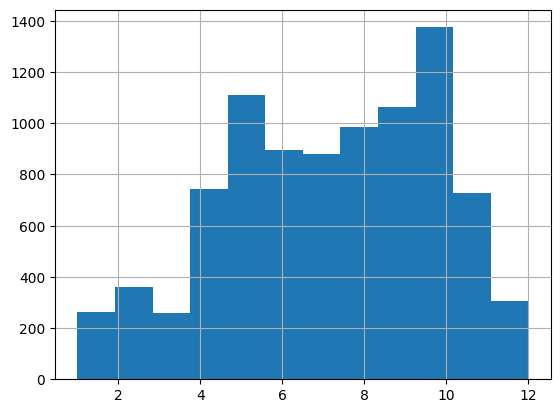

In [119]:
racehorses.month.hist(bins=12)
plt.show()

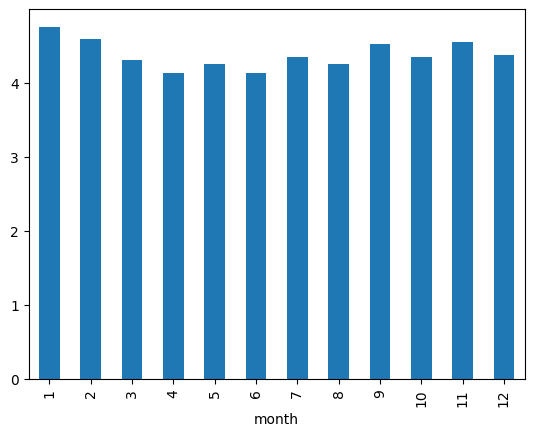

In [120]:
racehorses.groupby('month')['place'].mean().plot(kind='bar')
plt.show()

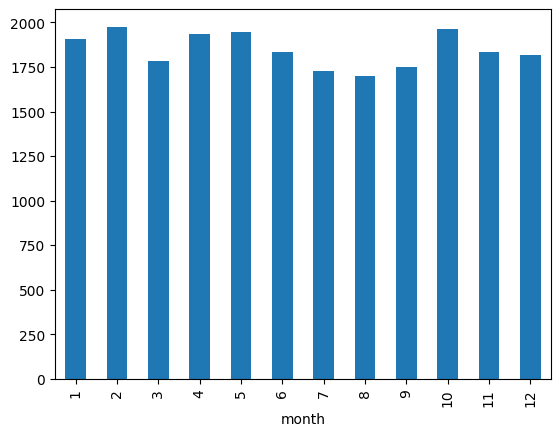

In [121]:
racehorses.groupby('month')['distance'].mean().plot(kind='bar')
plt.show()

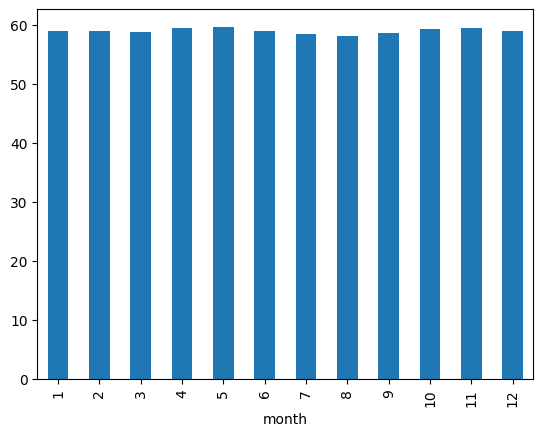

In [122]:
racehorses.groupby('month')['weight'].mean().plot(kind='bar')
plt.show()

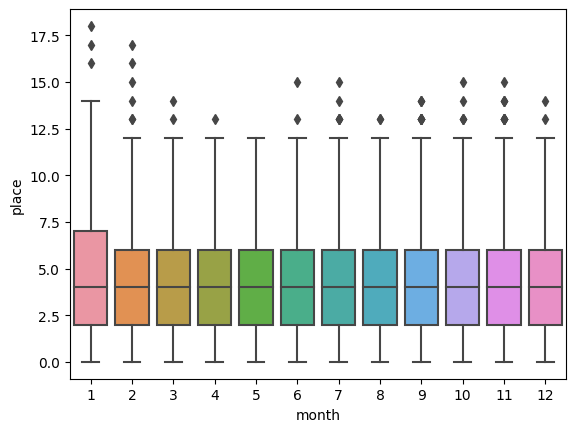

In [123]:
sns.boxplot(x='month', y='place', data=racehorses)
plt.show()

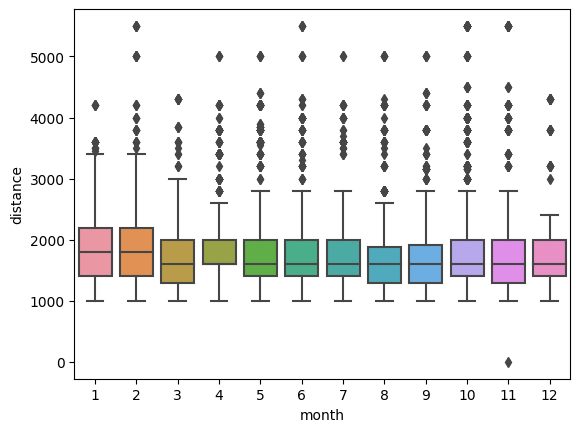

In [124]:
sns.boxplot(x='month', y='distance', data=racehorses)
plt.show()

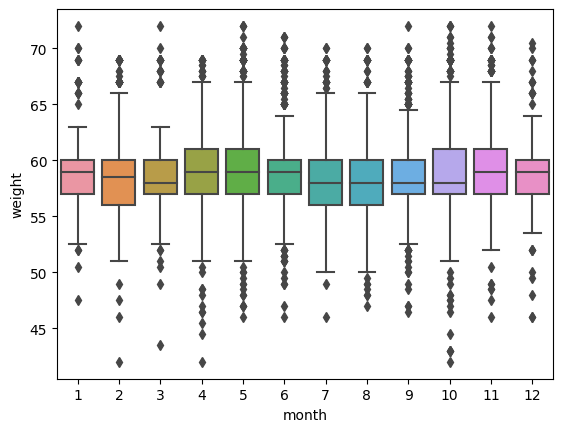

In [125]:
sns.boxplot(x='month', y='weight', data=racehorses)
plt.show()

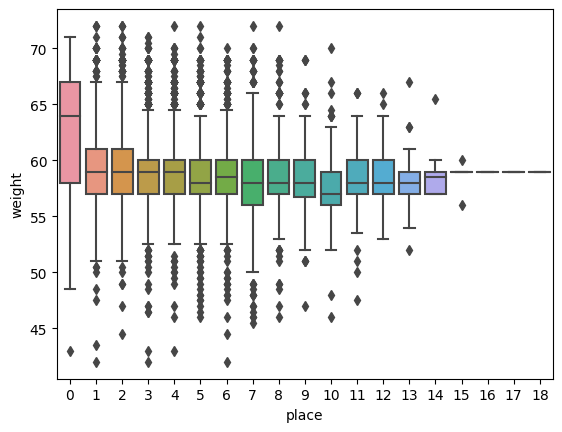

In [126]:
sns.boxplot(x='place', y='weight', data=racehorses)
plt.show()

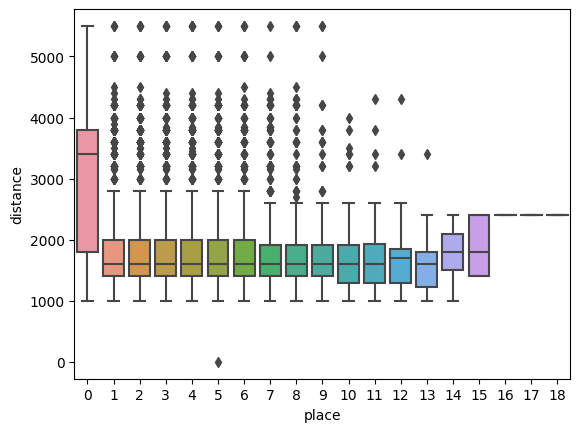

In [127]:
sns.boxplot(x='place', y='distance', data=racehorses)
plt.show()

In [128]:
racehorses[racehorses['distance'] == 0]

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month
7853,2012-11-16,Piza,0,płoty,D. Pastuszka,NaN,K. Rogowski,1956,5,0,NaN,11


In [129]:
polish_tracks = racehorses[racehorses.track.isin(['Warszawa', 'Wrocław', 'Sopot', 'Kraków'])]
abroad_tracks = racehorses[~racehorses.track.isin(['Warszawa', 'Wrocław', 'Sopot', 'Kraków'])]
jumping_races = racehorses[racehorses.category.isin(['steeple', 'płoty'])]
flat_races = racehorses[~racehorses.category.isin(['steeple', 'płoty'])]

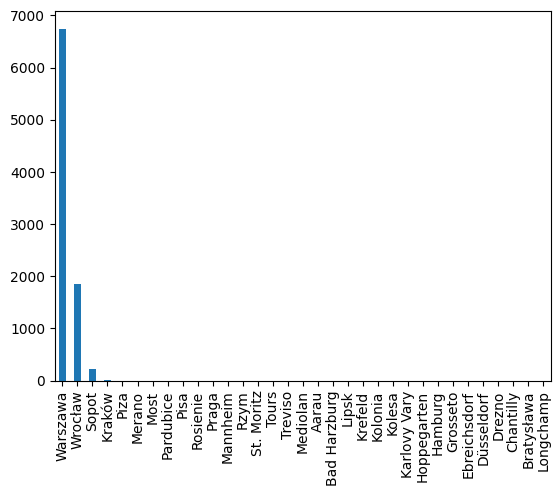

In [130]:
polish_tracks.track.value_counts().plot(kind='bar')
plt.show()

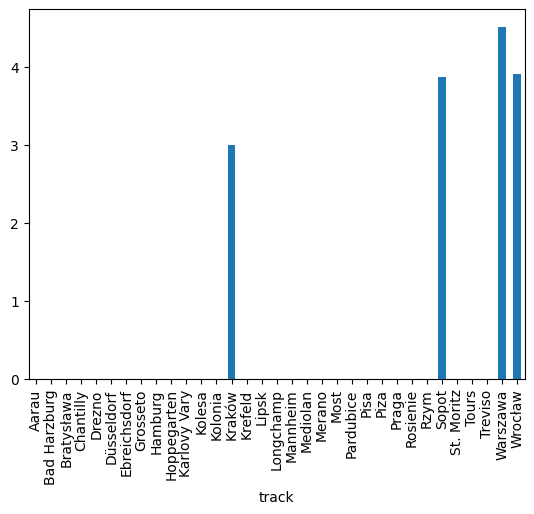

In [131]:
polish_tracks.groupby('track').place.mean().plot(kind='bar')
plt.show()

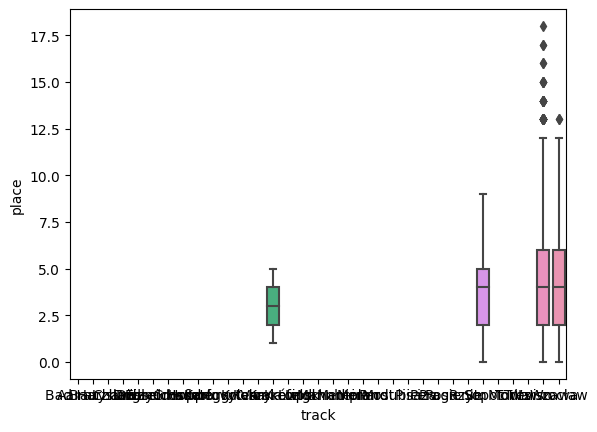

In [132]:
sns.boxplot(x='track', y='place', data=polish_tracks)
plt.show()

In [133]:
abroad_tracks.track.value_counts()

Hoppegarten     38
Drezno          22
Pardubice        8
Grosseto         8
Chantilly        7
Merano           7
Praga            6
Hamburg          6
Kolonia          4
Rosienie         4
Lipsk            4
St. Moritz       4
Piza             4
Kolesa           4
Bad Harzburg     3
Düsseldorf       3
Most             3
Bratysława       3
Pisa             3
Krefeld          2
Rzym             2
Aarau            2
Tours            1
Treviso          1
Longchamp        1
Mediolan         1
Mannheim         1
Karlovy Vary     1
Ebreichsdorf     1
Sopot            0
Kraków           0
Warszawa         0
Wrocław          0
Name: track, dtype: int64

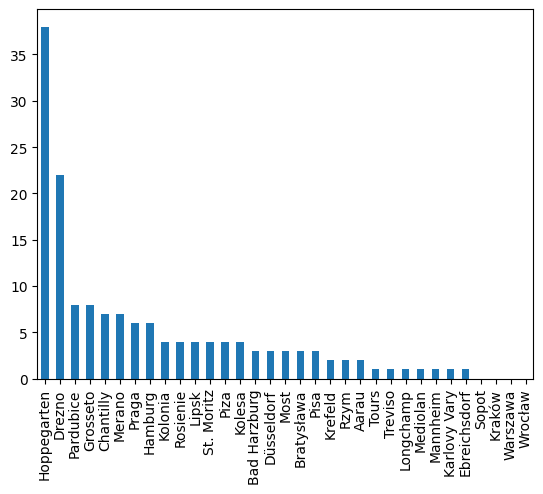

In [134]:
abroad_tracks.track.value_counts().plot(kind='bar')
plt.show()

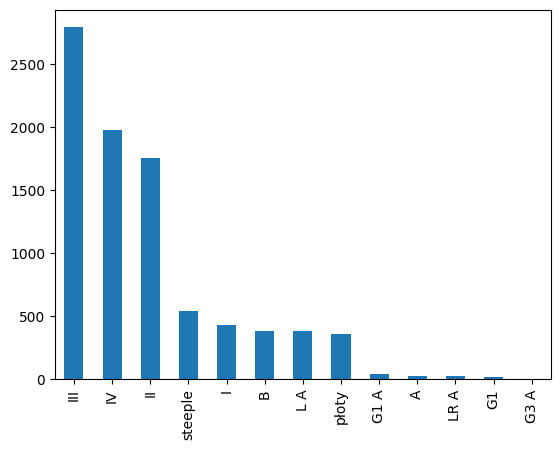

In [135]:
racehorses.category.value_counts().plot(kind='bar')
plt.show()

In [136]:
jumping_races.head()

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month
24,2019-08-09,Wrocław,5000,steeple,L. Sloup,69.0,R. Bodlak,10000,4,6,pr.dż.,8
25,2019-02-06,Wrocław,5500,steeple,S. Ferhanov,69.0,R. Bodlak,32000,2,8,pr.dż.,2
26,2018-05-08,Wrocław,4200,steeple,S. Ferhanov,72.0,R. Bodlak,0,8,10,pr.dż.,5
27,2018-10-06,Wrocław,5500,steeple,N. Lovén,69.0,R. Bodlak,0,0,11,dż.,10
28,2017-10-09,Wrocław,5000,steeple,N. Lovén,69.0,R. Bodlak,100000,1,8,dż.,10


In [137]:
(racehorses[racehorses.track.isin(['Wrocław', 'Sopot', 'Kraków'])]
                            .groupby('track', observed=True)
                            .count())

,date,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month
track,,,,,,,,,,,
Wrocław,1843,1843,1841,1843,1843,1843,1843,1843,1843,1843,1843
Sopot,218,218,214,218,218,218,218,218,218,218,218
Kraków,9,9,9,9,9,9,9,9,9,9,9
